<a href="https://colab.research.google.com/github/ksur/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score


%load_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
y_train


array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
#X_train

In [6]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [7]:
type(y_train)

numpy.ndarray

In [8]:
len(np.unique(y_train))

43

In [9]:
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [10]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [11]:
y_train.ndim

1

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [13]:
y_train.shape

(34799, 43)

In [14]:
y_test.shape

(4410, 43)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [18]:
model = Sequential([
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Flatten(),
                    Dense(num_classes, activation='softmax'),
                    ])

#model.summary()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 8.1173 - accuracy: 0.7965


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Flatten(),
                    Dense(num_classes, activation='softmax'),
                    ])

In [0]:
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(X_train, 
            y_train,
            batch_size=params_fit.get('batch_size', 128),
            epochs=params_fit.get('epochs', 5),
            verboses=params_fit.get('verbose', 1),
            validation_data=params_fit.get('validation_data', (X_train, y_train)),
            callbacks=[tensorboard_callback]
            )
  
  return model

In [0]:
df = pd.read_csv('data/signames.csv')
labels_dict = df.to_dict()['b']

In [23]:
model = get_cnn_v1(input_shape, num_classes)
y_test_norm = np.argmax(y_test)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 43.7894 - accuracy: 0.7082 - val_loss: 0.2702 - val_accuracy: 0.9378
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2427 - accuracy: 0.9456 - val_loss: 0.1625 - val_accuracy: 0.9601
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1603 - accuracy: 0.9648 - val_loss: 0.1603 - val_accuracy: 0.9639
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1356 - accuracy: 0.9696 - val_loss: 0.1050 - val_accuracy: 0.9759
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1027 - accuracy: 0.9759 - val_loss: 0.0460 - val_accuracy: 0.9886


In [24]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

predict(model_trained, X_test, y_test)


0.8487528344671201

In [0]:
def train_and_predict(model):
  
  model_trained = train_model(model, X_train, y_train)

  return predict(model_trained, X_test, y_test)

In [26]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    MaxPool2D(),
                    Dropout(0.3),
                    
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),
                    
                    Flatten(),
                    
                    Dense(1024, activation="relu"),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax'),
                    ])




train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 6.2491 - accuracy: 0.3442 - val_loss: 1.0000 - val_accuracy: 0.7539
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 1.0215 - accuracy: 0.6957 - val_loss: 0.3620 - val_accuracy: 0.9172
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.5633 - accuracy: 0.8295 - val_loss: 0.1729 - val_accuracy: 0.9600
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3881 - accuracy: 0.8832 - val_loss: 0.1039 - val_accuracy: 0.9783
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2842 - accuracy: 0.9158 - val_loss: 0.0666 - val_accuracy: 0.9887


0.9120181405895692

In [27]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),
                    
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
                    MaxPool2D(),
                    Dropout(0.3),
                    
                    Flatten(),
                    
                    Dense(1024, activation="relu"),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax'),
                    ])




train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 6s 20ms/step - loss: 2.3052 - accuracy: 0.5390 - val_loss: 0.2716 - val_accuracy: 0.9465
Epoch 2/5
272/272 [==============================] - 5s 19ms/step - loss: 0.4398 - accuracy: 0.8731 - val_loss: 0.0720 - val_accuracy: 0.9854
Epoch 3/5
272/272 [==============================] - 5s 19ms/step - loss: 0.2415 - accuracy: 0.9307 - val_loss: 0.0324 - val_accuracy: 0.9925
Epoch 4/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1694 - accuracy: 0.9517 - val_loss: 0.0242 - val_accuracy: 0.9948
Epoch 5/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1236 - accuracy: 0.9633 - val_loss: 0.0173 - val_accuracy: 0.9959


0.9741496598639455

In [28]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"),
                    MaxPool2D(),
                    Dropout(0.3),
                    
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
                    MaxPool2D(),
                    Dropout(0.3),
                     
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
                    MaxPool2D(),
                    Dropout(0.3),
                    
                    Flatten(),
                    
                    Dense(1024, activation="relu"),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax'),
                    ])




train_and_predict( get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.7585 - accuracy: 0.2733 - val_loss: 1.0079 - val_accuracy: 0.6915
Epoch 2/5
272/272 [==============================] - 6s 21ms/step - loss: 0.8055 - accuracy: 0.7423 - val_loss: 0.2003 - val_accuracy: 0.9480
Epoch 3/5
272/272 [==============================] - 6s 21ms/step - loss: 0.3405 - accuracy: 0.8961 - val_loss: 0.0648 - val_accuracy: 0.9819
Epoch 4/5
272/272 [==============================] - 6s 21ms/step - loss: 0.1954 - accuracy: 0.9419 - val_loss: 0.0469 - val_accuracy: 0.9870
Epoch 5/5
272/272 [==============================] - 6s 21ms/step - loss: 0.1586 - accuracy: 0.9528 - val_loss: 0.0277 - val_accuracy: 0.9932


0.9734693877551021

In [29]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"),
                    MaxPool2D(),
                    Dropout(0.3),
                    
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
                    MaxPool2D(),
                    Dropout(0.3),
                     
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
                    MaxPool2D(),
                    Dropout(0.3),
                    
                    Flatten(),
                    
                    Dense(1024, activation="relu"),
                    Dropout(0.3),

                    Dense(1024, activation="relu"),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax'),
                    ])




train_and_predict( get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.6881 - accuracy: 0.2743 - val_loss: 1.0651 - val_accuracy: 0.6491
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.8681 - accuracy: 0.7186 - val_loss: 0.3247 - val_accuracy: 0.8859
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.4157 - accuracy: 0.8664 - val_loss: 0.0987 - val_accuracy: 0.9722
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2522 - accuracy: 0.9231 - val_loss: 0.0590 - val_accuracy: 0.9837
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1806 - accuracy: 0.9462 - val_loss: 0.0295 - val_accuracy: 0.9914


0.9682539682539683

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [0]:
#X_train_gray.reshape(-1, 32, 32, 1)

In [40]:
model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 2.3726 - accuracy: 0.3223 - val_loss: 0.6478 - val_accuracy: 0.7860
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5442 - accuracy: 0.8225 - val_loss: 0.1334 - val_accuracy: 0.9648
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2550 - accuracy: 0.9186 - val_loss: 0.0609 - val_accuracy: 0.9847
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1717 - accuracy: 0.9463 - val_loss: 0.0349 - val_accuracy: 0.9910
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1208 - accuracy: 0.9624 - val_loss: 0.0267 - val_accuracy: 0.9921


0.9705215419501134

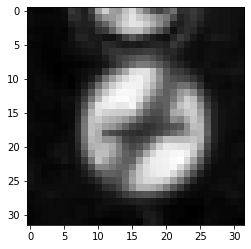

In [41]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
labels_dict[1]

In [0]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('data/signames.csv')
labels_dict = df.to_dict()['b']

In [0]:
%tensorboard --logdir logs

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    MaxPool2D(),
                    Dropout(0.5),
                    
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),
                    
                    
                    Flatten(),
                    Dense(1024, activation='relu'),
                    Dropout(0.5),

                    Dense(num_classes, activation='softmax'),
                    ])


model = get_cnn_v2(input_shape, num_classes)
params_fit = {
    'epochs' : 25
}
logdir = train_model(model, X_train, y_train, params_fit)


In [0]:
%tensorboard --logdir logs